In [1]:
from os import path
from os import mkdir
from itertools import zip_longest

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from chembl_webresource_client.new_client import new_client
from rdkit.Chem import Draw
from rdkit import Chem

/var/home/iaacornus/.anaconda3/envs/bioinformatics_full/lib/python3.10/site-packages/chembl_webresource_client/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __version__ = __import__('pkg_resources').get_distribution('chembl_webresource_client').version


In [2]:
# where the mol figs will be stored
if not path.exists(fig_path := "./chem_figs"):
    mkdir(fig_path)

In [3]:
# initiate the client to fetch
# molecule information
mol_target = new_client.molecule

In [4]:
chembl_data: Df = pd.DataFrame.from_dict(
        mol_target.search("magainin")
    )

NameError: name 'Df' is not defined

In [ ]:
chembl_data

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chemical_probe,chirality,cross_references,dosed_ingredient,first_approval,...,prodrug,score,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_flag
0,[],-1,"{'biocomponents': [], 'description': 'MAGAININ...",0,None,0,-1,[],False,None,...,-1,29.0,BOTH,False,False,None,None,None,None,False
1,[],-1,"{'biocomponents': [], 'description': 'MAGAININ...",0,None,0,-1,[],False,None,...,-1,26.0,BOTH,False,False,None,None,None,None,False
2,[],-1,"{'biocomponents': [], 'description': 'MAGAININ...",0,None,0,-1,[],False,None,...,-1,21.0,BOTH,False,False,None,None,None,None,False
3,[],-1,None,0,None,0,-1,[],False,None,...,-1,15.0,MOL,False,False,None,None,None,None,False
4,[],-1,"{'biocomponents': [], 'description': None, 'he...",0,None,0,-1,[],False,None,...,-1,14.0,BOTH,False,False,None,None,None,None,False
5,[],-1,"{'biocomponents': [], 'description': None, 'he...",0,None,0,-1,[],False,None,...,-1,14.0,BOTH,False,False,None,None,None,None,False
6,[],-1,"{'biocomponents': [], 'description': None, 'he...",0,None,0,-1,[],False,None,...,-1,11.0,BOTH,False,False,None,None,None,None,False
7,[],-1,None,0,None,0,-1,[],False,None,...,-1,11.0,MOL,False,False,None,None,None,None,False
8,[],-1,"{'biocomponents': [], 'description': None, 'he...",0,None,0,-1,[],False,None,...,-1,7.0,BOTH,False,False,None,None,None,None,False


In [ ]:
# hashmap for chembl_id: canonical smiles
chembl_mol = {}

for mol_name, id_, mol_type, smiles in zip(
        chembl_data["pref_name"],
        chembl_data["molecule_chembl_id"],
        chembl_data["molecule_type"],
        chembl_data["molecule_structures"],
    ):
    # save some data in a hashmap
    chembl_mol[id_] = {
            "mol_name": mol_name,
            "mol_id": id_,
            "mol_type": mol_type,
            "smiles": smiles["canonical_smiles"]
        }

In [ ]:
chembl_mol_pd: Df = pd.DataFrame(
        chembl_mol
    )
chembl_mol_pd

,CHEMBL437357,CHEMBL409372,CHEMBL414933,CHEMBL4088094,CHEMBL1673385,CHEMBL1673394,CHEMBL1673389,CHEMBL1673395,CHEMBL412693
mol_name,MAGAININ 1,MAGAININ I,MAGAININ 2,None,None,None,None,None,None
mol_id,CHEMBL437357,CHEMBL409372,CHEMBL414933,CHEMBL4088094,CHEMBL1673385,CHEMBL1673394,CHEMBL1673389,CHEMBL1673395,CHEMBL412693
mol_type,Protein,Protein,Protein,Small molecule,Protein,Protein,Protein,Small molecule,Protein
smiles,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)CNC...,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...,CC[C@H](C)[C@H](NC(=O)CNC(C)=O)C(=O)NCC(=O)N[C...,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...,CCCCCCCCCCC(=O)NCC(=O)N[C@H](C(=O)NCC(=O)N[C@@...,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...


In [ ]:
# draw the molecular structure using the
# canonical smiles fetched and rdkit
for mol_key in chembl_mol.keys():
    mol = Chem.MolFromSmiles(
            chembl_mol[mol_key]["smiles"]
        )
    mol_drawn = Draw.MolDraw2DCairo(400, 400)
    mol_drawn.DrawMolecule(mol)
    mol_drawn.FinishDrawing()
    png_data = mol_drawn.GetDrawingText()

    with open(
            f"./{fig_path}/{mol_key}.png", "wb"
        ) as mol_png:
        mol_png.write(png_data)

In [ ]:
ulimit: int = len(
        chembl_data["molecule_chembl_id"].keys()
    )

while ulimit%3 != 0:
    ulimit += 1

In [ ]:
COLS: int = 3
ROWS: int = round(ulimit/3)
MOL_COUNT: int = len(chembl_mol.keys())

In [ ]:
axes: list = []

In [ ]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Roboto"]

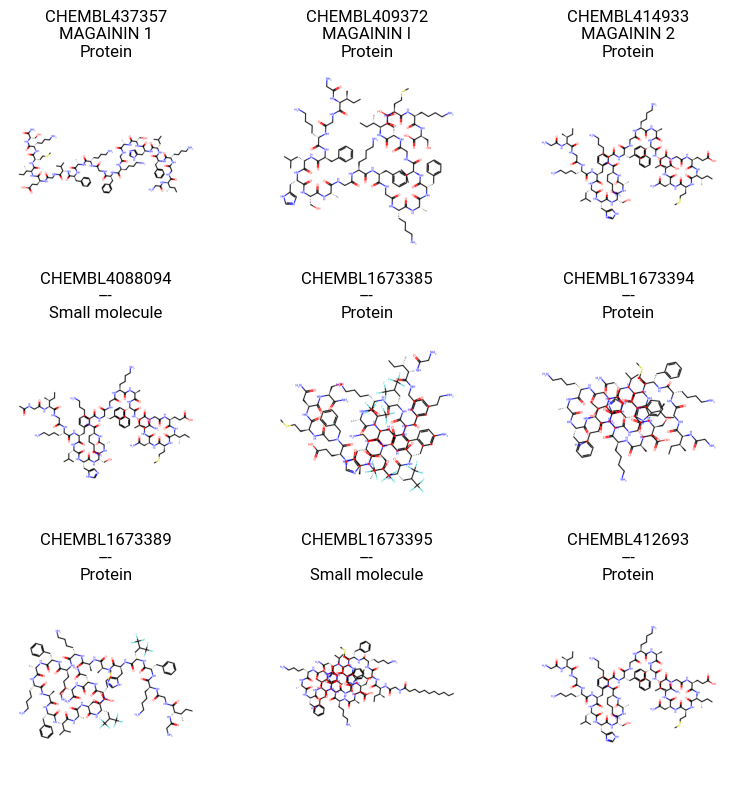

In [ ]:
fig = plt.figure(figsize=(8,8))
for i, id_ in zip_longest(
        range(ROWS*COLS),
        chembl_mol.keys()
    ):

    axes.append(
        fig.add_subplot(
            ROWS,
            COLS,
            i+1
        )
    )

    mol_data: dict[str, str] = chembl_mol[id_]
    mname: str = mol_data["mol_name"]
    mtype: str = mol_data["mol_type"]
    mid: str = mol_data["mol_id"]

    if not mname:
        mname: str = "---"

    img_path = f"{id_}.png"
    axes[-1].set_title(
        f"{mid}\n{mname}\n{mtype}"
    )
    plt.axis("off")
    plt.imshow(
        Image.open(
            f"./{fig_path}/{img_path}"
        )
    )

fig.tight_layout()
plt.savefig(
    f"{fig_path}/molecules.png",
    bbox_inches="tight",

)
plt.show()

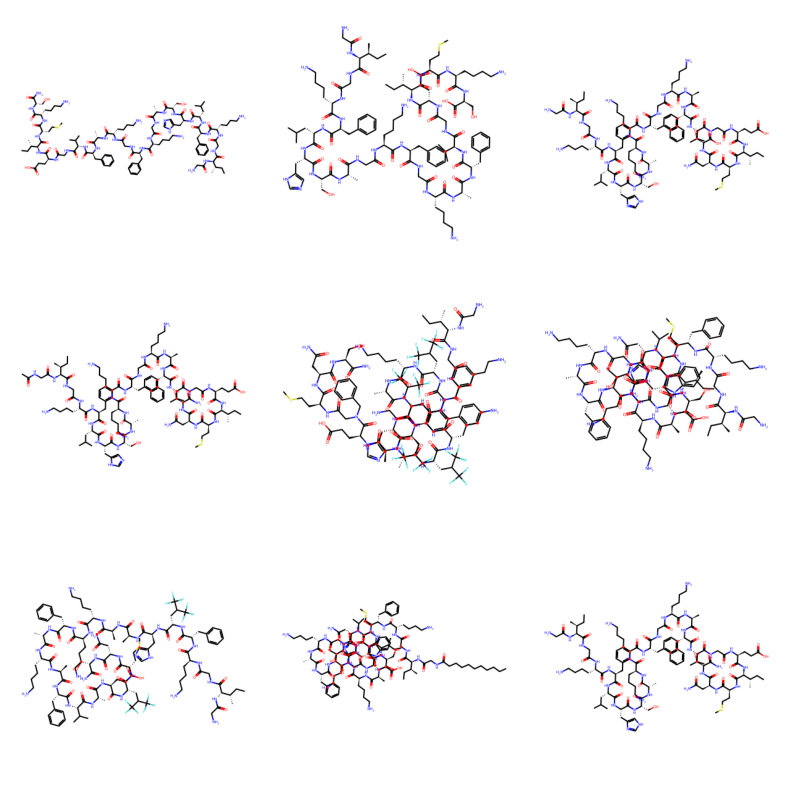

In [ ]:
fig = plt.figure(figsize=(8,8))
for i, id_ in zip_longest(
        range(ROWS*COLS),
        chembl_mol.keys()
    ):

    axes.append(
        fig.add_subplot(
            ROWS,
            COLS,
            i+1
        )
    )

    img_path = f"{id_}.png"
    plt.axis("off")
    plt.imshow(
        Image.open(
            f"./{fig_path}/{img_path}"
        )
    )

fig.tight_layout()
plt.savefig(
    f"{fig_path}/molecules_strip.png",
    bbox_inches="tight",

)
plt.show()